In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

In [7]:
!pip install pandas
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- -----------

In [8]:
# Step 1: Import libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Fetch the dataset from UCI
bike_sharing = fetch_ucirepo(id=275)

# Step 3: Get features and targets as pandas DataFrames
X = bike_sharing.data.features
y = bike_sharing.data.targets

# OPTIONAL: Preview data
print("Features preview:\n", X.head())
print("Target preview:\n", y.head())

# Step 4: Choose columns for linear regression
# We'll use numeric and meaningful predictors
selected_features = [
    'temp',         # Normalized temperature
    'hum',          # Normalized humidity
    'windspeed',    # Normalized wind speed
    'season',       # Categorical: 1=winter,...,4=fall
    'hr',           # Hour of the day
    'workingday'    # Binary: 1 = working day, 0 = not
]

# Step 5: Prepare features and target variable
X_model = X[selected_features]
y_model = y['cnt']  # total bike rentals

# Step 6: Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Step 10: Show coefficients
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)

Features preview:
        dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  
Target preview:
    cnt
0   16
1   40
2   32
3   13
4    1
Mean Squared Error: 20740.23
R² Score: 0.3450

Feature Coefficients:
      Feature  Coefficient
0        temp   121.442232
1       atemp   190.811947
2         hum  -227.305454
3   windspeed    21.159259
4      season    20.7

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features again
features = ['temp', 'hum', 'windspeed', 'season', 'hr', 'workingday']
X_model = X[features]
y_model = y['cnt']

# Categorical columns to one-hot encode
categorical_features = ['season', 'hr', 'workingday']
numeric_features = ['temp', 'hum', 'windspeed']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # keep numeric columns as-is
)

# Create pipeline
pipeline = make_pipeline(preprocessor, LinearRegression())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Improved Model:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Improved Model:
Mean Squared Error: 12139.04
R² Score: 0.6166


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Use one-hot encoded data for Random Forest too
pipeline_rf = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# Fit and predict
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Model:
Mean Squared Error: 6340.03
R² Score: 0.7998


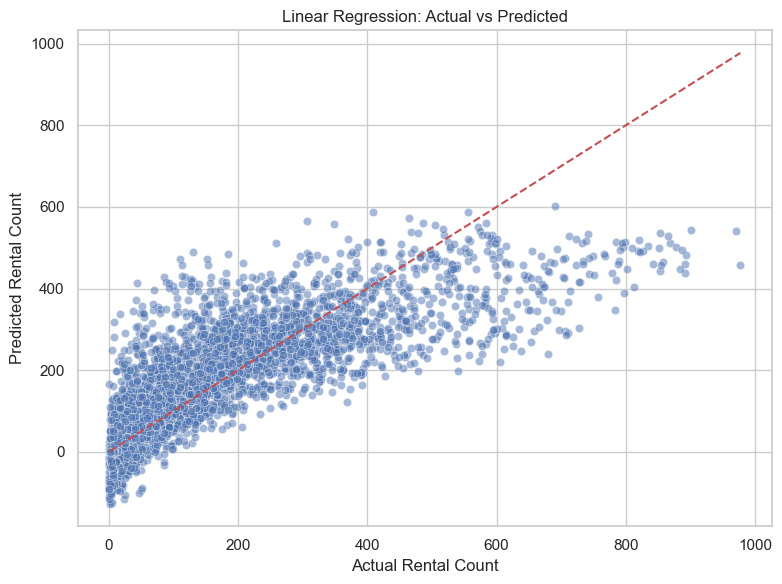

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# --- For Linear Regression Model ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Rental Count")
plt.ylabel("Predicted Rental Count")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.tight_layout()
plt.show()

# Linear Regression: Actual vs Predicted

## Overview

This scatter plot compares the actual bike rental counts (y_test) to the predicted counts (y_pred) from the Linear Regression model. The red dashed diagonal line represents perfect predictions where actual equals predicted. Points clustered closely along this line indicate accurate predictions.

## Insights:

The model captures general trends in rental counts but shows some spread, indicating prediction errors.

At higher rental counts, predictions tend to deviate more, suggesting the model struggles with extreme values.

Overall, this plot confirms that the Linear Regression provides a reasonable baseline but has limitations in capturing complex patterns.

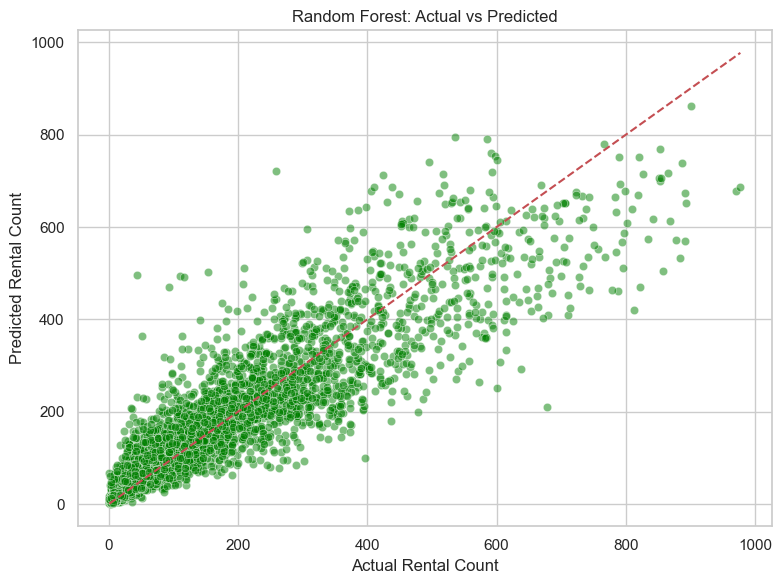

In [13]:
# Set plotting style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='green')
plt.xlabel("Actual Rental Count")
plt.ylabel("Predicted Rental Count")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# Random Forest: Actual vs Predicted

## Overview

This scatter plot shows actual versus predicted rental counts from the Random Forest model, using green markers. Like the previous plot, the red dashed line represents perfect prediction.

## Insights:

The points are more tightly clustered along the diagonal compared to Linear Regression, indicating better prediction accuracy.

The model handles extreme rental counts more effectively, reducing large prediction errors.

This visualization supports that the Random Forest model captures nonlinear relationships and interactions, resulting in improved performance.
